We replicate the Semi-synthetic MIMIC data generation process as in Meir et al 2025 paper.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(2025511)

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

import sys
import os

In [3]:
store_files = [
    "../semi_synthetic_data/mimic_1_semi.csv",
    "../semi_synthetic_data/mimic_2_semi.csv",
    "../semi_synthetic_data/mimic_3_semi.csv",
    "../semi_synthetic_data/mimic_4_semi.csv",
    "../semi_synthetic_data/mimic_5_semi.csv",
]

experiment_setups = {}

for path in store_files:
    base_name = os.path.splitext(os.path.basename(path))[0]  # e.g. mimic_1_semi
    scenario_dict = {}
    for scenario in range(1, 2): # only one scenario per mimic data
        try:
            result = pd.read_csv(path)
            if result is not None:
                scenario_dict[f"scenario_{scenario}"] = result
                print(f"Results for {base_name} :")
                print(f'\tCensoring rate: {(1 - result.event.mean()) * 100:.2f}%')
                print(f'\tTreatment rate: {result.W.mean() * 100:.2f}%')
                print(f'\tTrue ATE: {result.true_cate.mean()}')
                print(f'\tN: {result.shape[0]}')
                print(f'\tt_max: {result.observed_time.max()} ')
        except Exception as e:
            # Log or ignore as needed
            continue
    experiment_setups[base_name] = scenario_dict

Results for mimic_1_semi :
	Censoring rate: 88.49%
	Treatment rate: 49.92%
	True ATE: -1.2188716726261422
	N: 25170
	t_max: 42 
Results for mimic_2_semi :
	Censoring rate: 81.65%
	Treatment rate: 49.92%
	True ATE: -1.2188716726261422
	N: 25170
	t_max: 39 
Results for mimic_3_semi :
	Censoring rate: 74.10%
	Treatment rate: 49.92%
	True ATE: -1.2188716726261422
	N: 25170
	t_max: 41 
Results for mimic_4_semi :
	Censoring rate: 66.34%
	Treatment rate: 49.92%
	True ATE: -1.2188716726261422
	N: 25170
	t_max: 44 
Results for mimic_5_semi :
	Censoring rate: 53.35%
	Treatment rate: 49.92%
	True ATE: -1.2188716726261422
	N: 25170
	t_max: 42 


<Axes: >

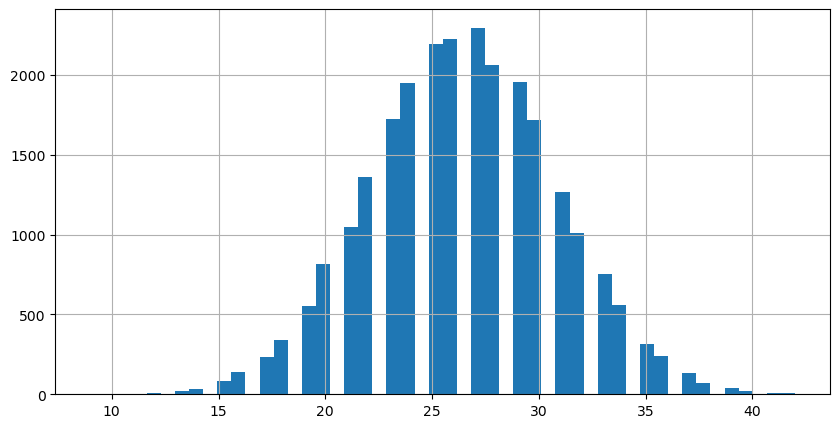

In [6]:
result.observed_time.hist(bins=50, figsize=(10, 5))

In [4]:
# generate idx split
df_split = pd.DataFrame({'idx': range(len(result))})
for i in range(10):
    seed = 2025511 + i
    np.random.seed(seed)
    df_split[f'random_idx{i}'] = np.random.permutation(df_split['idx'] )
df_split.to_csv('idx_split_mimic_syn.csv', index=False)
df_split.head()

,idx,random_idx0,random_idx1,random_idx2,random_idx3,random_idx4,random_idx5,random_idx6,random_idx7,random_idx8,random_idx9
0,0,20937,6193,12795,2633,10781,20395,19180,15879,24482,1759
1,1,11183,7859,8382,4024,22623,15150,14991,18732,10575,6021
2,2,4811,8956,21634,1675,2635,16721,22545,16421,19776,20892
3,3,2347,23657,18924,4116,11887,7341,4640,19371,20494,6615
4,4,2186,5604,18453,22662,23334,11003,2918,5819,6390,17837
